<a href="https://colab.research.google.com/github/yhy0519/Machine_learning_of_Python/blob/main/python_m02_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**■ 파이썬을 활용한 머신러닝**

 1.  knn 을 파이썬으로 구현하는 방법
 2.  naivebayes 를 파이썬으로 구현하는 방법 
 
  R 과  파이썬의 차이점 ?     
  1.  stringsAsFactors=True 를 안쓰고 그냥 로드 
  2.  명목형 데이터를 dummy 변수화 해야함

df = pd.get_dummies(df, drop_first=True) # 더미 변수 생성  
옵션: drop_first=True 를 사용하게 되면 생성된 더미변수중에 하나의 컬럼(첫번째)
을 삭제합니다. 


#**■ 의사 결정 트리(Decision tree)**

의사결정트리 --> 랜덤포레스트 (앙상블+의사결정트리)  
회귀분석

**□ 독버섯 데이터를 의사결정트리 알고리즘으로 분류하기**



In [ ]:
import pandas as pd  # 데이터 전처리를 위해서 
import seaborn as sns # 시각화를 위해서 

df = pd.read_csv('/content/drive/MyDrive/data/mushrooms.csv')

df = pd.get_dummies(df, drop_first=True)   # get_dummies 함수를 이용해서 값의 종류에 따라 
                                           # 전부 0 아니면 1로 변환함 
df

,type_poisonous,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_buff,cap_color_cinnamon,cap_color_gray,cap_color_green,cap_color_pink,cap_color_purple,cap_color_red,cap_color_white,cap_color_yellow,bruises_yes,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill_attachment_free,gill_spacing_crowded,gill_size_narrow,gill_color_brown,gill_color_buff,gill_color_chocolate,gill_color_gray,gill_color_green,gill_color_orange,gill_color_pink,gill_color_purple,gill_color_red,gill_color_white,...,stalk_color_above_ring_pink,stalk_color_above_ring_red,stalk_color_above_ring_white,stalk_color_above_ring_yellow,stalk_color_below_ring_buff,stalk_color_below_ring_cinnamon,stalk_color_below_ring_gray,stalk_color_below_ring_orange,stalk_color_below_ring_pink,stalk_color_below_ring_red,stalk_color_below_ring_white,stalk_color_below_ring_yellow,veil_color_orange,veil_color_white,veil_color_yellow,ring_number_one,ring_number_two,ring_type_flaring,ring_type_large,ring_type_none,ring_type_pendant,spore_print_color_brown,spore_print_color_buff,spore_print_color_chocolate,spore_print_color_green,spore_print_color_orange,spore_print_color_purple,spore_print_color_white,spore_print_color_yellow,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
8120,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
8121,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
8122,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [ ]:
print(df.shape)

(8124, 96)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 96 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   type_poisonous                   8124 non-null   uint8
 1   cap_shape_conical                8124 non-null   uint8
 2   cap_shape_convex                 8124 non-null   uint8
 3   cap_shape_flat                   8124 non-null   uint8
 4   cap_shape_knobbed                8124 non-null   uint8
 5   cap_shape_sunken                 8124 non-null   uint8
 6   cap_surface_grooves              8124 non-null   uint8
 7   cap_surface_scaly                8124 non-null   uint8
 8   cap_surface_smooth               8124 non-null   uint8
 9   cap_color_buff                   8124 non-null   uint8
 10  cap_color_cinnamon               8124 non-null   uint8
 11  cap_color_gray                   8124 non-null   uint8
 12  cap_color_green                  8124 non-null  

In [ ]:
print(df.describe())

       type_poisonous  cap_shape_conical  ...  habitat_waste  habitat_woods
count     8124.000000        8124.000000  ...    8124.000000    8124.000000
mean         0.482029           0.000492  ...       0.023634       0.387494
std          0.499708           0.022185  ...       0.151914       0.487208
min          0.000000           0.000000  ...       0.000000       0.000000
25%          0.000000           0.000000  ...       0.000000       0.000000
50%          0.000000           0.000000  ...       0.000000       0.000000
75%          1.000000           0.000000  ...       0.000000       1.000000
max          1.000000           1.000000  ...       1.000000       1.000000

[8 rows x 96 columns]


In [ ]:
# 종속변수와 독립변수를 구성하는 작업
X = df.iloc[:,1:].to_numpy()   # 독립변수들
y = df.iloc[:,0].to_numpy()    # 종속변수
X

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
y

array([1, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [ ]:
print(df.shape)  
print(len(X))
print(len(y)) 

(8124, 96)
8124
8124


In [ ]:
# 훈련 데이터 75, 테스트 데이터 25으로 나눈다. 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 10)

print(X_train.shape)   
print(y_train.shape)   

(6093, 95)
(6093,)


In [ ]:
# 학습/예측(Training/Pradiction)

# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

#  의사결정트리 분류기를 생성 (criterion='entropy' 적용)
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
# criterion 은 entropy 와 gini 가 있습니다.
# max_depth 는 가지의 깊이를 나타냄, 너무 깊으면 오버피팅된다.

# 분류기 학습
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
import sys
import numpy as np
import pandas as pd
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_columns', 500)      # 행과 열을 생략하지 말고 다 나오게 하는 방법

# 예측
y_pred= classifier.predict(X_test)
print(y_pred)

[0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1
 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1
 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0
 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1
 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1
 1 1 0 1 1 1 0 1 0 0 0 0 

In [ ]:
# 작은 이원교차표
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)    

[[1072    0]
 [   0  959]]


In [ ]:
# 정밀도 , 재현율, f1 score 확인 
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1072
           1       1.00      1.00      1.00       959

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [ ]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)#  1.0   Decision tree 
               #  0.9497   MultinomialNB
               #  0.9615   GaussianNB
               #  0.9350   BernoulliNB

1.0


**□ 아이리스 데이터 실습**  
문제14. iris 데이터를 의사결정트리로 분류하시오 ! 
	(중요한 컬럼 확인 - 정보획득량이 제일 높은것 확인)

In [ ]:
import pandas as pd  # 데이터 전처리를 위해서 
import seaborn as sns # 시각화를 위해서 

col_names = ['sepal-length', 'sepal-width','petal-length', 'petal-width','Class']

df =  pd.read_csv('/content/drive/MyDrive/data/iris2.csv', encoding='UTF-8', header=None, names=col_names)
df

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
print(df.shape)

(150, 5)


In [ ]:
# DataFrame 확인
print(df.info())  # Class object (문자)형, 나머지 변수 숫자형으로 되어있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print(df.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = df.iloc[:,:-1].to_numpy() 
y = df.iloc[:,-1].to_numpy()   

print(len(X))  # 150
print(len(y))  # 150

150
150


In [ ]:
# 최대 최소 정규화를 진행해서 0~1 사이의 데이터로 변환합니다
from sklearn import preprocessing 

X=preprocessing.MinMaxScaler().fit(X).transform(X) 

In [ ]:
# 훈련 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split 
                                                                                     
# 훈련 데이터 75, 테스트 데이터 25으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 10)

print(X_train.shape)  
print(y_train.shape)  

(112, 4)
(112,)


In [ ]:
# 학습/예측(Training/Pradiction)
# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

#  의사결정트리 분류기를 생성 (criterion='entropy' 적용)
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# 분류기 학습
classifier.fit(X_train, y_train)

# 특성 중요도(정보획득량을 이용해서 종속변수에 미치는 중요도를 확인)
print(df.columns.values)  # 컬럼 출력
print("특성 중요도 : \n{}".format(classifier.feature_importances_))

['sepal-length' 'sepal-width' 'petal-length' 'petal-width' 'Class']
특성 중요도 : 
[0.         0.         0.70789981 0.29210019]


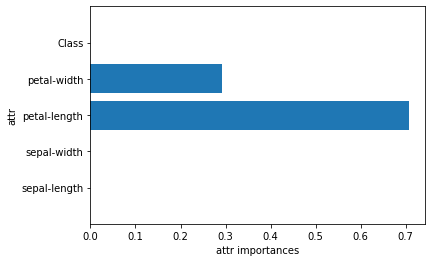

In [ ]:
# 특성 중요도 시각화
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = df.shape[1]   # iris 데이터의 컬럼의 개수 df.shape : (150, 5)
    plt.barh(range(n_features-1),model.feature_importances_, align='center')  # 가로 막대 그래프(y,x)
    plt.yticks(np.arange(n_features), df.columns.values)  # y축 눈금 값
    plt.xlabel("attr importances")   # x 축 이름
    plt.ylabel("attr")   # y 축 이름
    plt.ylim(-1,n_features)  # y 축의 눈금의 범위 : y축 제한 설정

#설명: n_features-1 는 n_features 가 iris 의 컬럼의 개수 5개인데 그 중에 독립변수가 4개이므로 -1 을 해준 것입니다.

plot_feature_importances_cancer(classifier)
plt.show()

의사결정나무 모델의 특성 중요도를 시각화 함.  
**특성 중요도란 ? 특정 변수가 모델을 구하는 비율을 나타냄  
.feature_importances_ 로 확인하며 값이 낮다고 필요없는 변수는 아니다.  
<= 이 트리모델이 해당 변수를 선택하지 않아서 이거나, 다른 특성이 같은 정보를 가지고 있어서 값이 낮게 나올 수 있다.


In [ ]:
# 예측
y_pred= classifier.predict(X_test)

# 작은 이원교차표
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix) 

[[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]


In [ ]:
# 정밀도 , 재현율, f1 score 확인 
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [ ]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy) 

0.9736842105263158


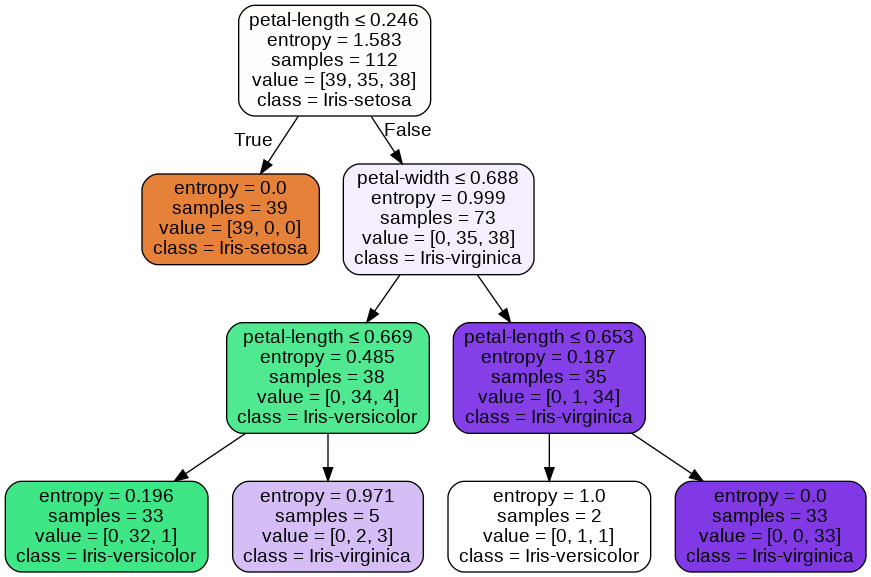

In [ ]:
# 의사결정트리를 시각화합니다.
import pydotplus   # 의사결정트리 시각화를 위해 필요
from sklearn.tree import export_graphviz  # 의사결정트리 시각화를 위해 필요
from IPython.core.display import Image  # 쥬피터 노트북에서 시각화하기 위해 쓴 패키지
import matplotlib.pyplot as plt  # 스파이더에서 시각화된 것 보려면 필요

# 그래프 설정

# out_file=None : 결과를 파일로 저장하지 않겠다.
# filled=True : 상자 채우기
# rounded=True : 상자모서리 둥그렇게 만들기
# special_characters=True : 상자안에 내용 넣기

dot_data = export_graphviz(classifier, out_file=None,
                           feature_names=df.columns.values[0:4],   # 독립변수 4개의 컬럼명
                           class_names=classifier.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

# 그래프 그리기

dot_data
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# 그래프 해석
#첫번째 줄 : 분류 기준
#entropy : 엔트로피값
#sample : 분류한 데이터 개수
#value : 클래스별 데이터 개수
#class : 예측한 답

문제15. max_depth 를 3이 아니라 4를 주고 다시 모델을 만들고 시각화 하시오!

In [ ]:
# 학습/예측(Training/Pradiction)
# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

#  의사결정트리 분류기를 생성 (criterion='entropy' 적용)
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

# 분류기 학습
classifier.fit(X_train, y_train)

# 특성 중요도(정보획득량을 이용해서 종속변수에 미치는 중요도를 확인)
print(df.columns.values)  # 컬럼 출력
print("특성 중요도 : \n{}".format(classifier.feature_importances_))

['sepal-length' 'sepal-width' 'petal-length' 'petal-width' 'Class']
특성 중요도 : 
[0.01127733 0.         0.06585352 0.92286915]


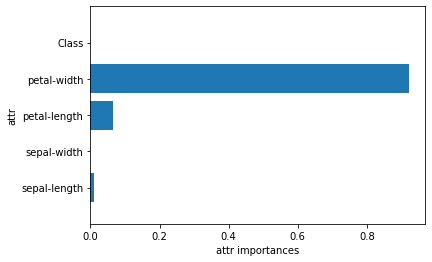

In [ ]:
# 특성 중요도 시각화
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = df.shape[1]   # iris 데이터의 컬럼의 개수 df.shape : (150, 5)
    plt.barh(range(n_features-1),model.feature_importances_, align='center')  # 가로 막대 그래프(y,x)
    plt.yticks(np.arange(n_features), df.columns.values)  # y축 눈금 값
    plt.xlabel("attr importances")   # x 축 이름
    plt.ylabel("attr")   # y 축 이름
    plt.ylim(-1,n_features)  # y 축의 눈금의 범위 : y축 제한 설정

plot_feature_importances_cancer(classifier)
plt.show()

In [ ]:
#예측
y_pred= classifier.predict(X_test)

# 작은 이원교차표
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)    

[[11  0  0]
 [ 0 15  0]
 [ 0  1 11]]


In [ ]:
# 정밀도 , 재현율, f1 score 확인 
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [ ]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy) 

0.9736842105263158


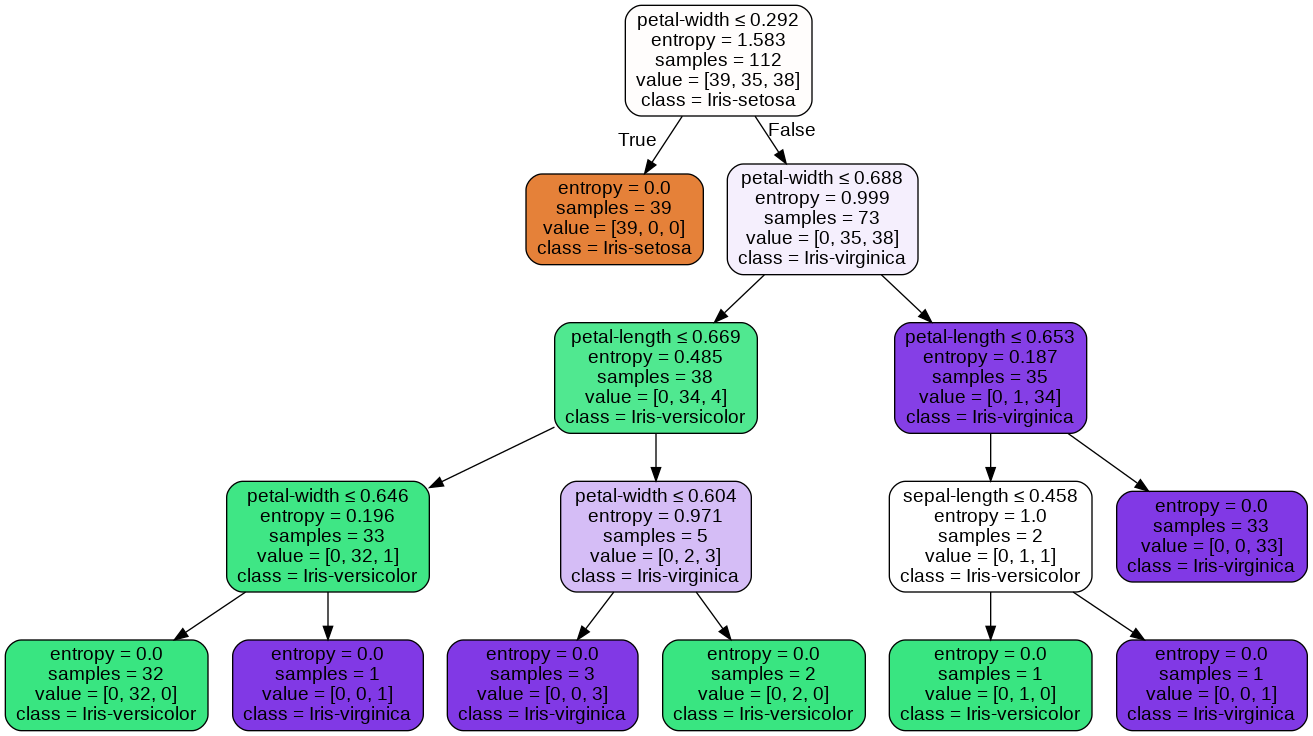

In [ ]:
# 의사결정트리를 시각화합니다.
import pydotplus   # 의사결정트리 시각화를 위해 필요
from sklearn.tree import export_graphviz  # 의사결정트리 시각화를 위해 필요
from IPython.core.display import Image  # 쥬피터 노트북에서 시각화하기 위해 쓴 패키지
import matplotlib.pyplot as plt  # 스파이더에서 시각화된 것 보려면 필요

# 그래프 설정
dot_data = export_graphviz(classifier, out_file=None,
                           feature_names=df.columns.values[0:4],   # 독립변수 4개의 컬럼명
                           class_names=classifier.classes_,
                           filled=True, rounded=True,
                           special_characters=True)
 
# 그래프 그리기
dot_data 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**□ 화장품 구매 고객 실습**  
문제16. 화장품 데이터(skin.csv) 를 이용해서 의사결정트리 모델을 생성하시오!


In [ ]:
import pandas as pd  # 데이터 전처리를 위해서 
import seaborn as sns # 시각화를 위해서 

df =  pd.read_csv('/content/drive/MyDrive/data/skin.csv')

df = pd.get_dummies(df, drop_first=True) # 더미 변수 생성 (범주-1 개 씩)
df

,cust_no,age,gender_male,job_YES,marry_YES,car_YES,cupon_react_YES
0,1,30,1,0,1,0,0
1,2,20,0,1,1,1,0
2,3,20,0,1,1,0,0
3,4,40,0,0,0,0,0
4,5,30,0,0,1,0,0
5,6,30,0,0,0,1,0
6,7,20,0,0,1,0,0
7,8,20,0,0,1,1,1
8,9,30,0,1,1,0,1
9,10,40,1,1,0,1,1


In [ ]:
print(df.shape) 

(30, 7)


In [ ]:
# DataFrame 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   cust_no          30 non-null     int64
 1   age              30 non-null     int64
 2   gender_male      30 non-null     uint8
 3   job_YES          30 non-null     uint8
 4   marry_YES        30 non-null     uint8
 5   car_YES          30 non-null     uint8
 6   cupon_react_YES  30 non-null     uint8
dtypes: int64(2), uint8(5)
memory usage: 758.0 bytes
None


In [ ]:
print(df.describe())

         cust_no        age  gender_male    job_YES  marry_YES    car_YES  \
count  30.000000  30.000000    30.000000  30.000000  30.000000  30.000000   
mean   15.500000  30.000000     0.400000   0.566667   0.666667   0.433333   
std     8.803408   7.427814     0.498273   0.504007   0.479463   0.504007   
min     1.000000  20.000000     0.000000   0.000000   0.000000   0.000000   
25%     8.250000  22.500000     0.000000   0.000000   0.000000   0.000000   
50%    15.500000  30.000000     0.000000   1.000000   1.000000   0.000000   
75%    22.750000  37.500000     1.000000   1.000000   1.000000   1.000000   
max    30.000000  40.000000     1.000000   1.000000   1.000000   1.000000   

       cupon_react_YES  
count        30.000000  
mean          0.433333  
std           0.504007  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000  


In [ ]:
# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = df.iloc[:,1:-1].to_numpy() 
y = df.iloc[:,-1].to_numpy()   

print(len(X))  # 30
print(len(y))  # 30

30
30


In [ ]:
# 훈련 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split 
                                                                                     
# 훈련 데이터 75, 테스트 데이터 25으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 10)

print(X_train.shape)   
print(y_train.shape) 
print(X_test.shape)

(22, 5)
(22,)
(8, 5)


In [ ]:
# 학습/예측(Training/Pradiction)
# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

#  의사결정트리 분류기를 생성 (criterion='entropy' 적용)
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# 분류기 학습
classifier.fit(X_train, y_train)

# 특성 중요도(정보획득량을 이용해서 종속변수에 미치는 중요도를 확인)
print(df.columns.values[1:6])  # 컬럼 출력
print("특성 중요도 : \n{}".format(classifier.feature_importances_))

['age' 'gender_male' 'job_YES' 'marry_YES' 'car_YES']
특성 중요도 : 
[0.41471753 0.16602642 0.21955247 0.19970358 0.        ]


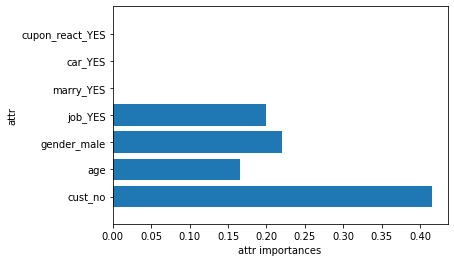

In [ ]:
# 특성 중요도 시각화
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = df.shape[1]
    plt.barh(range(n_features-2),model.feature_importances_, align='center')  # 가로 막대 그래프
    plt.yticks(np.arange(n_features), df.columns.values)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1,n_features)

plot_feature_importances_cancer(classifier)
plt.show()

In [ ]:
# 예측
y_pred= classifier.predict(X_test)

# 작은 이원교차표
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)    

[[5 0]
 [2 1]]


In [ ]:
# 정밀도 , 재현율, f1 score 확인 
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.33      0.50         3

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8



In [ ]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print(accuracy)

0.75


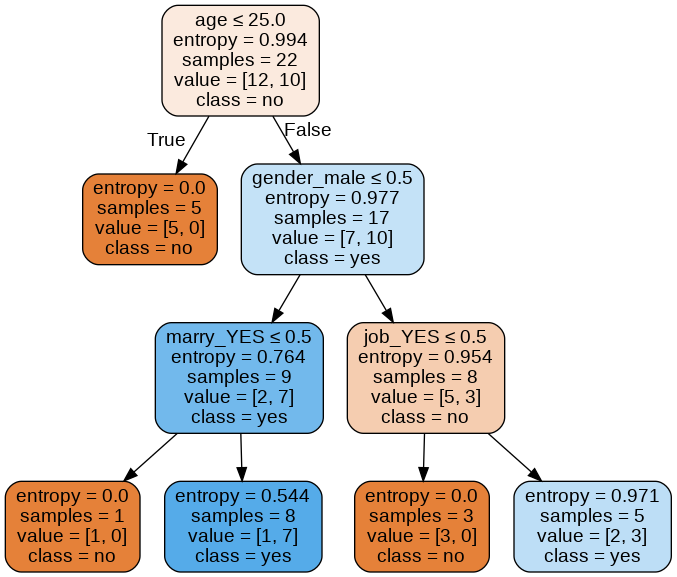

In [ ]:
# 의사결정트리를 시각화합니다.
import pydotplus   # 의사결정트리 시각화를 위해 필요
from sklearn.tree import export_graphviz  # 의사결정트리 시각화를 위해 필요
from IPython.core.display import Image  # 쥬피터 노트북에서 시각화하기 위해 쓴 패키지
import matplotlib.pyplot as plt  # 스파이더에서 시각화된 것 보려면 필요

# 그래프 설정
dot_data = export_graphviz(classifier, out_file=None,
                           feature_names=df.columns.values[1:6],
                           class_names=['no','yes'],
                           filled=True, rounded=True,
                           special_characters=True)

# 그래프 그리기

dot_data
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**□ 독일은행 데이터 실습**  
문제17. R을 활용하는 머신러닝에서 사용했던 독일 은행 데이터의 채무 불이행자를 예측하고 의사결정트리 나무를 시각화 하시오 !

In [ ]:
import pandas as pd  # 데이터 전처리를 위해서 
import seaborn as sns # 시각화를 위해서 

df =  pd.read_csv('/content/drive/MyDrive/data/credit.csv', encoding='UTF-8')

df = pd.get_dummies(df, drop_first=True)
df

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes,default_yes
0,6,1169,4,4,67,2,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1
2,12,2096,2,3,49,1,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,24,4870,3,4,53,2,2,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
996,30,3857,4,4,40,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
997,12,804,4,4,38,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
998,45,1845,4,4,23,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1


In [ ]:
# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = df.iloc[:,0:35].to_numpy() 
y = df.iloc[:,-1].to_numpy()   

print(len(X))
print(len(y))

1000
1000


In [ ]:
# 훈련 데이터 75, 테스트 데이터 25으로 나눈다. 
from sklearn.model_selection import train_test_split 
                                                                                     
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 10)

print(X_train.shape)  
print(y_train.shape)  

(750, 35)
(750,)


In [ ]:
from sklearn import tree

#  의사결정트리 분류기를 생성 (criterion='entropy' 적용)
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# 분류기 학습
classifier.fit(X_train, y_train)

# 특성 중요도
print(df.columns.values[0:35])
print("특성 중요도 : \n{}".format(classifier.feature_importances_))

['months_loan_duration' 'amount' 'percent_of_income' 'years_at_residence'
 'age' 'existing_loans_count' 'dependents' 'checking_balance_< 0 DM'
 'checking_balance_> 200 DM' 'checking_balance_unknown'
 'credit_history_good' 'credit_history_perfect' 'credit_history_poor'
 'credit_history_very good' 'purpose_car' 'purpose_car0'
 'purpose_education' 'purpose_furniture/appliances' 'purpose_renovations'
 'savings_balance_500 - 1000 DM' 'savings_balance_< 100 DM'
 'savings_balance_> 1000 DM' 'savings_balance_unknown'
 'employment_duration_4 - 7 years' 'employment_duration_< 1 year'
 'employment_duration_> 7 years' 'employment_duration_unemployed'
 'other_credit_none' 'other_credit_store' 'housing_own' 'housing_rent'
 'job_skilled' 'job_unemployed' 'job_unskilled' 'phone_yes']
특성 중요도 : 
[0.12149968 0.06746675 0.         0.         0.         0.
 0.         0.         0.         0.51562034 0.         0.
 0.         0.         0.         0.         0.         0.05273428
 0.         0.         0. 

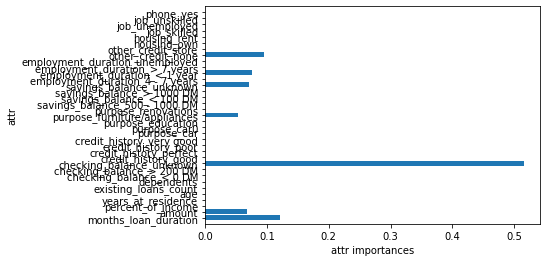

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = df.shape[1]-1
    plt.barh(range(n_features),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df.columns.values[0:35])
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1,n_features)

plot_feature_importances_cancer(classifier)
plt.show()

In [ ]:
y_pred= classifier.predict(X_test)

# 작은 이원교차표
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
#print(conf_matrix)   

# 정밀도 , 재현율, f1 score 확인 
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
#print(report)

# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print( accuracy)

0.7


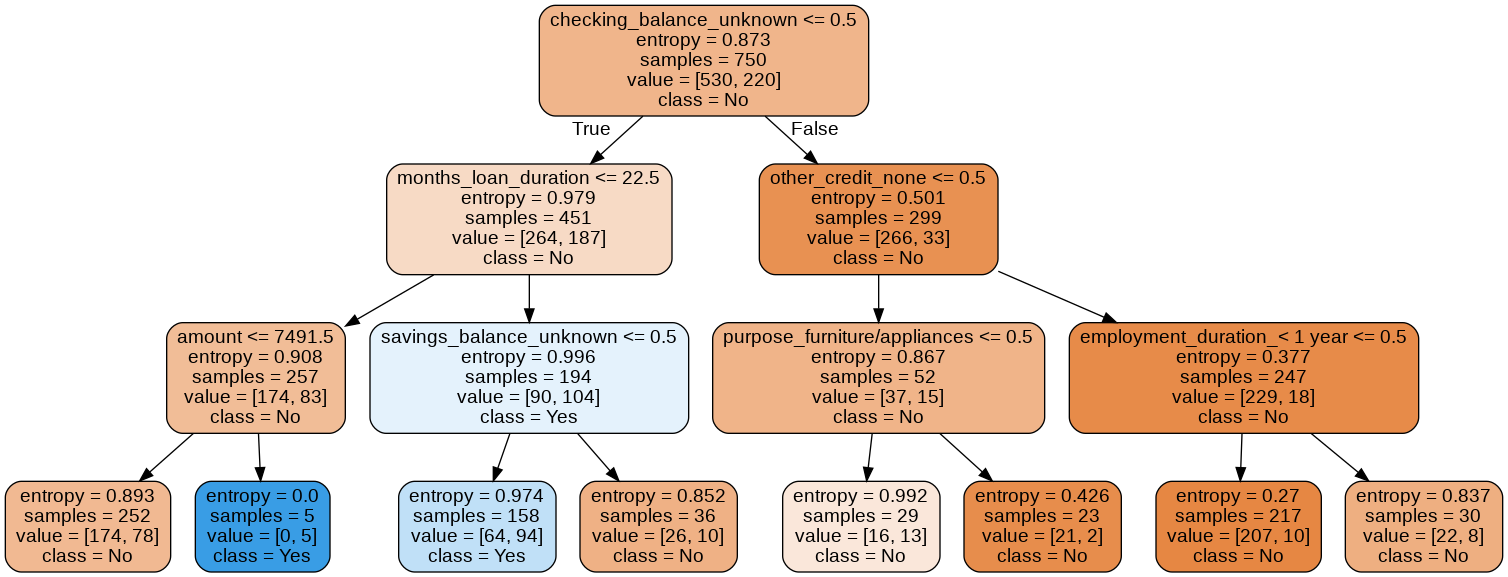

In [ ]:
# 의사결정트리를 시각화합니다.
import pydotplus   # 의사결정트리 시각화를 위해 필요
from sklearn.tree import export_graphviz  # 의사결정트리 시각화를 위해 필요
from IPython.core.display import Image  # 쥬피터 노트북에서 시각화하기 위해 쓴 패키지
import matplotlib.pyplot as plt  # 스파이더에서 시각화된 것 보려면 필요

# 그래프 설정
dot_data=export_graphviz(classifier, out_file=None, 
                         feature_names=df.columns.values[:-1],
                         class_names=['No', 'Yes'],
                         filled = True, rounded=True)

# 그래프 그리기
dot_data
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

문제18. 위의 의사결정트리의 모델을 의사결정트리 + 앙상블 기법을 적용한 랜덤포레스트로 구현하시오 !

In [ ]:
from sklearn import tree
from  sklearn.ensemble   import  RandomForestClassifier 

#  의사결정트리 분류기를 생성 (criterion='entropy' 적용)
classifier = RandomForestClassifier( n_estimators=100, oob_score=True,random_state= 10 )  

classifier.fit( X_train, y_train )

print (classifier.oob_score_)

0.7533333333333333


#**■ 단순 회귀 분석(Simple Regression)**

 1. 단순 회귀 분석

 2. 다중 회귀 분석  
1970년대 후반과 1980년대 초반의 자동차 연비를 예측하는 모델을 만듭니다.  
이 기간에 출시된 자동차 정보를 모델에 제공하겠습니다.  
이 정보에는 실린더 수, 배기량, 마력(horsepower), 공차 중량 같은 속성이 포함되어 있는 데이터 입니다. 

In [ ]:
# 단순 회귀

# -*- coding: utf-8 -*-
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('/content/drive/MyDrive/data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
# 데이터 살펴보기
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [ ]:
# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [ ]:
'''
[Step 2] 데이터 탐색
'''
# 데이터 자료형 확인
print(df.info())

# 설명 : horsepower 가 object 여서 수치형 데이터로 변경해야합니다.
# 전처리가 필요한 문자가 포함되어있어서 object 문자형으로 출력되고 있습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [ ]:
# 데이터 통계 요약정보 확인
print(df.describe())

# 숫자형 자료들만 출력으로 horsepower 누락됨을 확인.
# 통계 요약정보를 출력하려면 숫자형 데이터여야 합니다.

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [ ]:
# mpg 는 mile per gallon 의 약자로 영국과 미국에서는 한국과는 달리
# 갤런당 마일 단위로 연비를 표시합니다.
# 한국은 리터당 킬로미터(km/L) 단위로 표시한다.
# mpg 열을 한국에서 사용하는 km/L 로 변환해줘야 합니다.
# 1 갤런 = 3.78541 L, 1 마일 = 1.60934 km
# 그렇다면 1 mpg(mile per gallon) 은 ?

# print(1.60934 / 3.78541 )  # 0.425 km/L

In [ ]:
# horsepower 열의 자료형 변경 (문자열 ->숫자)
print(df['horsepower'].unique()) # horsepower 열의 고유값 확인 --> '?' 값이 확인됨

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


In [ ]:
df['horsepower'].replace('?', np.nan, inplace=True) # '?'을 np.nan(결측치)으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float') # 문자열을 실수형으로 변환
print(df.describe()) # 데이터 통계 요약정보 확인

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [ ]:
'''
[Step 3] 속성(feature 또는 variable) 선택
'''
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


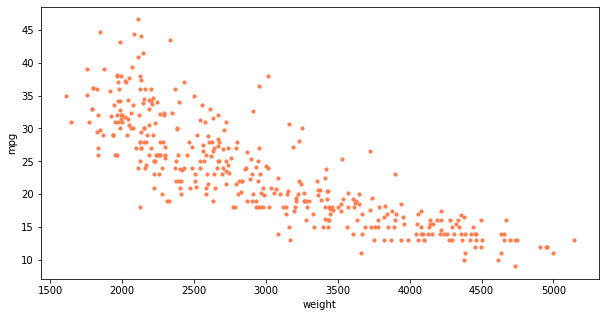

In [ ]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

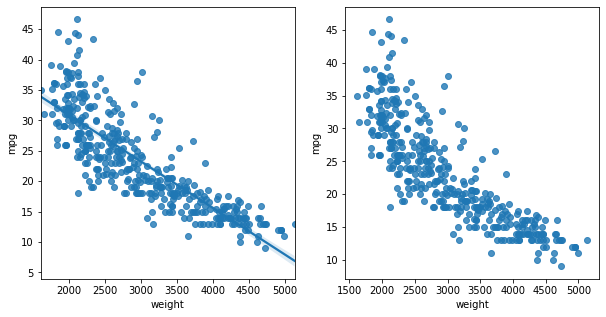

In [ ]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   # 전체 그림판 가로 10, 세로 5로 잡아주고
ax1 = fig.add_subplot(1, 2, 1)      # 첫번째 그림판 영역 설정 
ax2 = fig.add_subplot(1, 2, 2)      # 두번째 그림판 영역 설정
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1) # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False) #회귀선 미표시
plt.show()
plt.close()

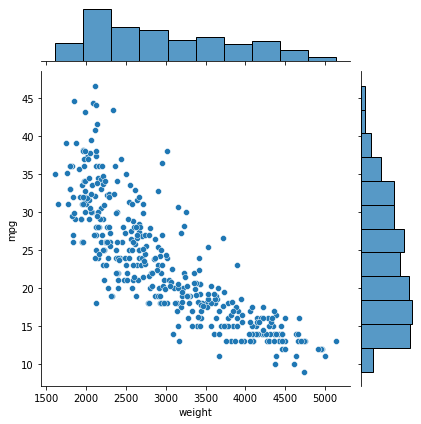

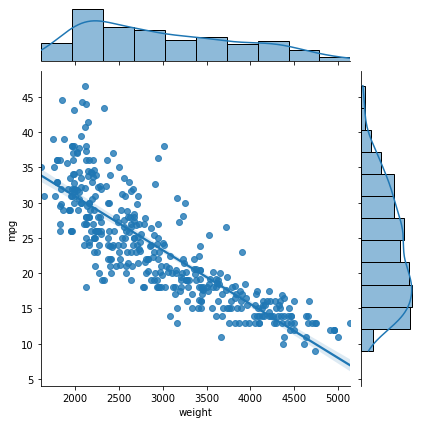

In [ ]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf) # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf) # 회귀선 표시
plt.show()
plt.close()

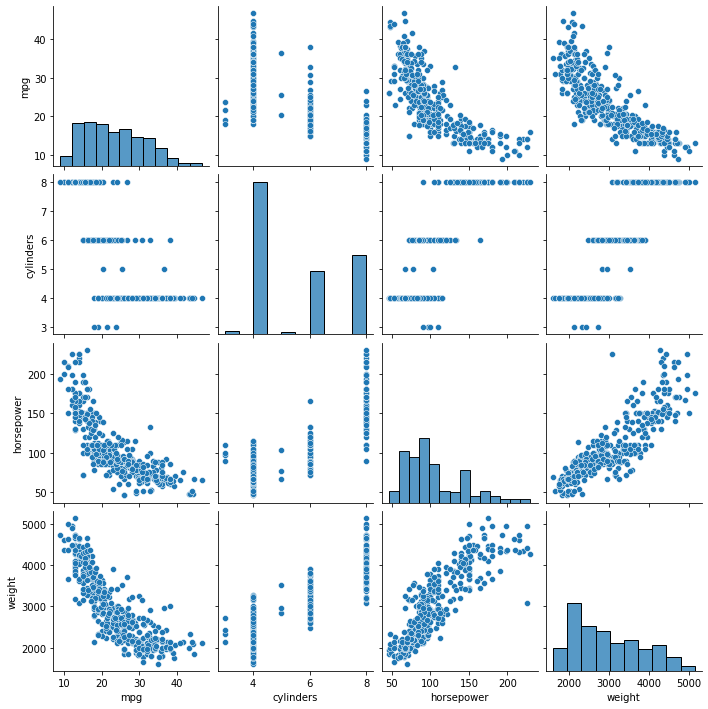

In [ ]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)
plt.show()
plt.close()

In [ ]:
'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''
# 속성(변수) 선택
X=ndf[['weight']] #독립 변수 X
y=ndf['mpg'] #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, #독립 변수
 y, #종속 변수
 test_size=0.3, #검증 30%
 random_state=10) #랜덤 추출 값

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


In [ ]:
'''
Step 5: 단순회귀분석 모형 - sklearn 사용
'''
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')

0.6822458558299322


기울기 a:  [-0.00775343]


y절편 b 46.7103662572801




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


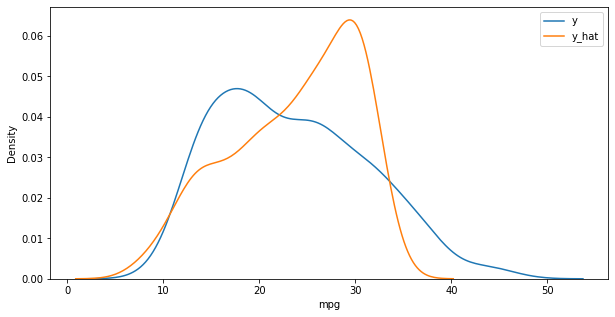

In [ ]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X)
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()

마지막 문제. 체중과 키 데이터를 이용해서 단순 선형 회귀분석을 하고 seaborn 그래프로 시각화 하시오!

    몸무게 : 독립변수, 키 : 종속변수

In [ ]:
# 단순 회귀

# -*- coding: utf-8 -*-
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
'''
[Step 1] 데이터 준비
'''
# 데이터프레임으로 변환
weight=[ 72, 72, 70, 43, 48, 54, 51, 52, 73, 45, 60, 62, 64, 47, 51, 74, 88,64, 56, 56  ]
tall = [ 176, 172, 182, 160, 163, 165, 168, 163, 182, 148, 170, 166, 172, 169, 163, 170, 182, 174, 164, 160 ] 

dict_data = { 'weight' : [ 72, 72, 70, 43, 48, 54, 51, 52, 73, 45, 60, 62, 64, 47, 51, 74, 88, 64, 56, 56  ],
                  'tall' : [ 176, 172, 182, 160, 163, 165, 168, 163, 182, 148, 170, 166, 172, 169, 163, 170, 182, 174, 164, 160 ]   }

df = pd.DataFrame(dict_data)
print(df)

    weight  tall
0       72   176
1       72   172
2       70   182
3       43   160
4       48   163
5       54   165
6       51   168
7       52   163
8       73   182
9       45   148
10      60   170
11      62   166
12      64   172
13      47   169
14      51   163
15      74   170
16      88   182
17      64   174
18      56   164
19      56   160


In [ ]:
'''
[Step 2] 데이터 탐색
'''
# 데이터 자료형 확인
print(df.info())   # 전부 숫자형 데이터
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   weight  20 non-null     int64
 1   tall    20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes
None


          weight        tall
count  20.000000   20.000000
mean   60.100000  168.450000
std    11.907097    8.450942
min    43.000000  148.000000
25%    51.000000  163.000000
50%    58.000000  168.500000
75%    70.500000  172.500000
max    88.000000  182.000000




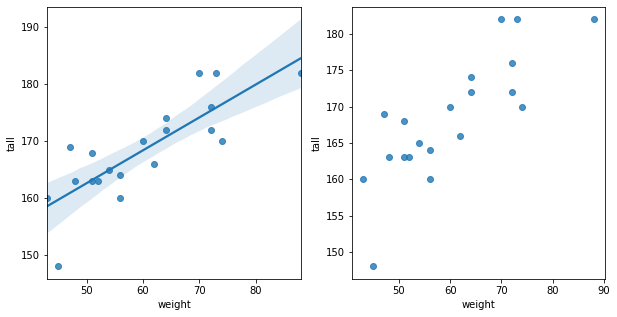

In [ ]:
'''
[Step 3] 속성(feature 또는 variable) 선택
'''
### 종속 변수 Y인 "키(tall)"와 독립 변수 몸무게(weight) 간의 선형관계를 그래프(산점도)로 확인
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   # 전체 그림판 가로 10, 세로 5로 잡아주고
ax1 = fig.add_subplot(1, 2, 1)      # 첫번째 그림판 영역 설정 
ax2 = fig.add_subplot(1, 2, 2)      # 두번째 그림판 영역 설정
sns.regplot(x='weight', y='tall', data=df, ax=ax1) # 회귀선 표시
sns.regplot(x='weight', y='tall', data=df, ax=ax2, fit_reg=False) #회귀선 미표시
plt.show()
plt.close()

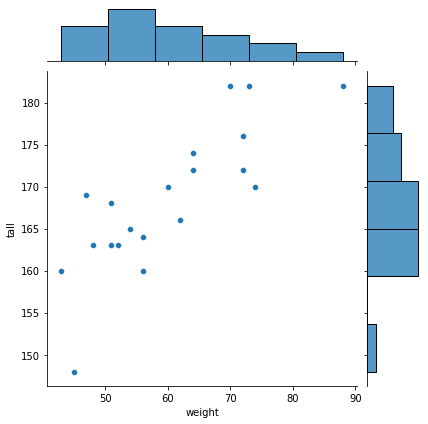

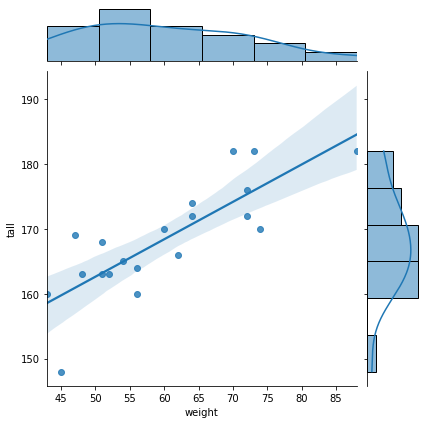

In [ ]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='tall', data=df) # 회귀선 없음
sns.jointplot(x='weight', y='tall', kind='reg', data=df) # 회귀선 표시
plt.show()
plt.close()

In [ ]:
'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''
# 속성(변수) 선택
X=df[['weight']] #독립 변수 X
y=df['tall'] #종속 변수 y

# train data 와 test data로 구분(9:1 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, #독립 변수
 y, #종속 변수
 test_size=0.1, #검증 10%
 random_state=10) #랜덤 추출 값

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  18
test data 개수:  2


In [ ]:
'''
Step 5: 단순회귀분석 모형 - sklearn 사용
'''
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr 

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')

0.8657609246754262


기울기 a:  [0.57510584]


y절편 b 133.84081287044876




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


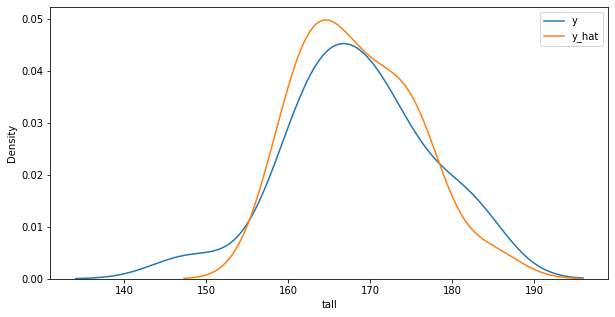

In [ ]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X)
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()